# Project Title:- News Articles Sorting
Technologies:- Deep Learning Technology (NLP)
Domain:- Media
Project Difficulties level:- Intermediate

# IMPORTING SOME REQUIRED LIBRARY

In [1]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Reading csv file using pandas library

In [2]:
df=pd.read_csv(r"C:\Users\Sadanand\Desktop\BBC_ News_ Train.csv",encoding= 'unicode_escape')
df.head(5)

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [3]:
df.tail(5)

,ArticleId,Text,Category
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech
1489,538,santy worm makes unwelcome visit thousands of ...,tech


In [4]:
df.isnull().sum()


ArticleId    0
Text         0
Category     0
dtype: int64

In [5]:
df.shape

(1490, 3)

In [6]:
df.Category.unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [7]:
#pd.value_counts(df['Category'])

In [8]:
category = {'business':0,'tech':1,'politics':2,'sport':3,'entertainment':4}

In [9]:
df['Category']= df['Category'].map(category)
df

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,0
1,154,german business confidence slides german busin...,0
2,1101,bbc poll indicates economic gloom citizens in ...,0
3,1976,lifestyle governs mobile choice faster bett...,1
4,917,enron bosses in $168m payout eighteen former e...,0
...,...,...,...
1485,857,double eviction from big brother model caprice...,4
1486,325,dj double act revamp chart show dj duo jk and ...,4
1487,1590,weak dollar hits reuters revenues at media gro...,0
1488,1587,apple ipod family expands market apple has exp...,1


<Figure size 2880x2880 with 0 Axes>

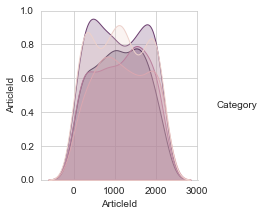

In [11]:
# Let's Visualize the Target Column
sns.set_style("whitegrid")
plt.figure(figsize=(40,40))
sns.pairplot(hue='Category', data=df,height=3)
plt.show()

#  DATA PREPROCESSING


In [14]:
df['Text'][5]

'howard  truanted to play snooker  conservative leader michael howard has admitted he used to play truant to spend time with his school friends at a snooker hall.  mr howard said his time at jack s snooker hall in llanelli in the 1950s had not done him  any lasting damage . but he told the times educational supplement that truancy was  very bad  and said  firm action  was needed. mr howard also called for a return to o-levels and more classroom discipline.  mr howard eventually left llanelli grammar school - and the snooker hall - to go to cambridge university. he said:  i don t think it s done me any lasting damage. nor has it made me a snooker world champion.  there might have been some occasions when we left early of an afternoon.   i m just being honest. i think truancy is a very bad thing and that firm action should be taken to deal with it.  another player who has failed to win snooker s world championship - jimmy  the whirlwind   white - has previously admitted missing lessons  

In [15]:
# 1)TOKENIZATION
def tokenizer(text):
    return text.split()
df['Text']=df['Text'].apply(tokenizer)

In [16]:
df['Text'][5]#after

['howard',
 'truanted',
 'to',
 'play',
 'snooker',
 'conservative',
 'leader',
 'michael',
 'howard',
 'has',
 'admitted',
 'he',
 'used',
 'to',
 'play',
 'truant',
 'to',
 'spend',
 'time',
 'with',
 'his',
 'school',
 'friends',
 'at',
 'a',
 'snooker',
 'hall.',
 'mr',
 'howard',
 'said',
 'his',
 'time',
 'at',
 'jack',
 's',
 'snooker',
 'hall',
 'in',
 'llanelli',
 'in',
 'the',
 '1950s',
 'had',
 'not',
 'done',
 'him',
 'any',
 'lasting',
 'damage',
 '.',
 'but',
 'he',
 'told',
 'the',
 'times',
 'educational',
 'supplement',
 'that',
 'truancy',
 'was',
 'very',
 'bad',
 'and',
 'said',
 'firm',
 'action',
 'was',
 'needed.',
 'mr',
 'howard',
 'also',
 'called',
 'for',
 'a',
 'return',
 'to',
 'o-levels',
 'and',
 'more',
 'classroom',
 'discipline.',
 'mr',
 'howard',
 'eventually',
 'left',
 'llanelli',
 'grammar',
 'school',
 '-',
 'and',
 'the',
 'snooker',
 'hall',
 '-',
 'to',
 'go',
 'to',
 'cambridge',
 'university.',
 'he',
 'said:',
 'i',
 'don',
 't',
 'think',

In [17]:
# 2)STEMMING
from nltk.stem.snowball import SnowballStemmer
sbs = SnowballStemmer("english",ignore_stopwords=False)

def stem_it(text):
    return [sbs.stem(word) for word in text]


df['Text'] =df['Text'].apply(stem_it)

df['Text'][5]#after stemming

['howard',
 'truant',
 'to',
 'play',
 'snooker',
 'conserv',
 'leader',
 'michael',
 'howard',
 'has',
 'admit',
 'he',
 'use',
 'to',
 'play',
 'truant',
 'to',
 'spend',
 'time',
 'with',
 'his',
 'school',
 'friend',
 'at',
 'a',
 'snooker',
 'hall.',
 'mr',
 'howard',
 'said',
 'his',
 'time',
 'at',
 'jack',
 's',
 'snooker',
 'hall',
 'in',
 'llanelli',
 'in',
 'the',
 '1950s',
 'had',
 'not',
 'done',
 'him',
 'ani',
 'last',
 'damag',
 '.',
 'but',
 'he',
 'told',
 'the',
 'time',
 'educ',
 'supplement',
 'that',
 'truanci',
 'was',
 'veri',
 'bad',
 'and',
 'said',
 'firm',
 'action',
 'was',
 'needed.',
 'mr',
 'howard',
 'also',
 'call',
 'for',
 'a',
 'return',
 'to',
 'o-level',
 'and',
 'more',
 'classroom',
 'discipline.',
 'mr',
 'howard',
 'eventu',
 'left',
 'llanelli',
 'grammar',
 'school',
 '-',
 'and',
 'the',
 'snooker',
 'hall',
 '-',
 'to',
 'go',
 'to',
 'cambridg',
 'university.',
 'he',
 'said:',
 'i',
 'don',
 't',
 'think',
 'it',
 's',
 'done',
 'me',
 '

In [18]:
# 3)LEMMITIZATION
from nltk.stem import WordNetLemmatizer
lemma =  WordNetLemmatizer()

def lemmit_it(text):
    return [lemma.lemmatize(word,pos="a") for word in text]

df['Text']=df['Text'].apply(lemmit_it)

df['Text'][90]#before

['could',
 'rivalri',
 'overshadow',
 'elect',
 'toni',
 'blair',
 'and',
 'gordon',
 'brown',
 'are',
 'desper',
 'tri',
 'to',
 'stuff',
 'the',
 'geni',
 'of',
 'their',
 'rivalri',
 'back',
 'into',
 'the',
 'bottle.',
 'along',
 'with',
 'ani',
 'number',
 'of',
 'senior',
 'cabinet',
 'colleagu',
 'they',
 'are',
 'insist',
 'their',
 'onli',
 'job',
 'is',
 'to',
 'win',
 'the',
 'next',
 'elect',
 'and',
 'govern',
 'in',
 'the',
 'best',
 'interest',
 'of',
 'britain.',
 'it',
 'is',
 'a',
 'messag',
 'they',
 'are',
 'aim',
 'direct',
 'at',
 'their',
 'backbench',
 'who',
 'are',
 'becom',
 'irrit',
 'and',
 'even',
 'unnerv',
 'by',
 'the',
 'continu',
 'claim',
 'and',
 'counter',
 'claim',
 'surround',
 'this',
 'alleg',
 'rift.',
 'ian',
 'gibson',
 'for',
 'exampl',
 'urg',
 'the',
 'two',
 'men',
 'to',
 'stop',
 'squabbl',
 'declaring:',
 'for',
 'good',
 'sake',
 'sometim',
 'you',
 'have',
 'to',
 'rise',
 'abov',
 'petul',
 'and',
 'make',
 'sure',
 'that',
 'you',

In [19]:
# Remove Stoping words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def stop_it(text):
    review = [word for word in text if not word in stop_words]
    return review



df['Text']=df['Text'].apply(stop_it)





df['Text'][100]#before

['honda',
 'win',
 'china',
 'copyright',
 'rule',
 'japan',
 'honda',
 'copyright',
 'case',
 'beij',
 'evid',
 'china',
 'take',
 'tough',
 'line',
 'protect',
 'intellectu',
 'properti',
 'rights.',
 'court',
 'rule',
 'chongq',
 'lifan',
 'industri',
 'group',
 'must',
 'stop',
 'sell',
 'honda',
 'brand',
 'motorbik',
 'said',
 'must',
 'pay',
 '1.47m',
 'yuan',
 '($177',
 '600)',
 'compensation.',
 'intern',
 'recogn',
 'regul',
 'key',
 'part',
 'china',
 'plan',
 'develop',
 'economi',
 'analyst',
 'said.',
 'beij',
 'also',
 'threaten',
 'sanction',
 'fail',
 'clamp',
 'down.',
 'chines',
 'firm',
 'copi',
 'product',
 'rang',
 'comput',
 'softwar',
 'spark',
 'plug',
 'babi',
 'milk',
 'compact',
 'discs.',
 'despit',
 'fact',
 'product',
 'piraci',
 'major',
 'problem',
 'foreign',
 'compani',
 'onli',
 'occasion',
 'case',
 'compens',
 'award',
 'usual',
 'small.',
 'still',
 'recent',
 'rule',
 'announc',
 'boost',
 'optim',
 'attitud',
 'changing.',
 'early',
 'week',
 'c

In [20]:
df.head()

,ArticleId,Text,Category
0,1833,"[worldcom, ex-boss, launch, defenc, lawyer, de...",0
1,154,"[german, busi, confid, slide, german, busi, co...",0
2,1101,"[bbc, poll, indic, econom, gloom, citizen, maj...",0
3,1976,"[lifestyl, govern, mobil, choic, fast, good, f...",1
4,917,"[enron, boss, $168m, payout, eighteen, former,...",0


In [24]:

from sklearn.feature_extraction.text import TfidfVectorizer
def dummy_fun(doc):
    return doc
TFV=TfidfVectorizer(analyzer='word',tokenizer=dummy_fun,preprocessor=dummy_fun,token_pattern=None)
y=df['Category'].values
x=TFV.fit_transform(df['Text'])



In [29]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_text = train_test_split(x,y,random_state=1,test_size=0.3) 

In [33]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=0) 
svc.fit(x_train,y_train)
y_pred =svc.predict(x_test)

In [34]:
y_pred

array([1, 2, 0, 0, 4, 0, 0, 2, 2, 2, 3, 4, 3, 1, 4, 3, 4, 1, 4, 3, 3, 3,
       1, 2, 2, 1, 2, 0, 4, 2, 0, 1, 4, 1, 1, 3, 0, 3, 3, 3, 2, 4, 2, 4,
       4, 0, 3, 2, 0, 0, 2, 1, 4, 2, 1, 0, 2, 4, 0, 1, 1, 3, 4, 3, 0, 0,
       1, 3, 3, 2, 2, 2, 0, 1, 1, 2, 3, 0, 4, 4, 3, 3, 2, 2, 1, 2, 3, 1,
       4, 0, 3, 0, 1, 4, 3, 3, 2, 3, 0, 0, 0, 3, 2, 1, 0, 4, 3, 3, 4, 4,
       1, 1, 4, 3, 2, 1, 1, 1, 2, 4, 3, 4, 3, 1, 1, 4, 2, 1, 0, 3, 3, 4,
       1, 4, 2, 3, 1, 4, 2, 2, 0, 4, 0, 2, 4, 0, 0, 0, 2, 4, 4, 0, 2, 3,
       0, 2, 1, 3, 3, 3, 1, 0, 4, 3, 0, 1, 4, 4, 1, 2, 3, 0, 2, 1, 4, 3,
       3, 3, 3, 3, 4, 0, 0, 3, 2, 2, 4, 3, 2, 0, 3, 4, 1, 3, 1, 3, 2, 3,
       0, 1, 4, 2, 4, 3, 0, 2, 2, 1, 4, 1, 2, 3, 2, 0, 2, 2, 1, 3, 0, 3,
       0, 0, 3, 0, 3, 1, 0, 2, 0, 0, 4, 3, 1, 0, 1, 0, 4, 4, 0, 4, 2, 2,
       3, 0, 3, 1, 3, 1, 0, 2, 1, 0, 4, 3, 4, 4, 0, 4, 0, 4, 4, 3, 0, 0,
       4, 1, 2, 3, 1, 3, 1, 0, 4, 0, 2, 0, 4, 3, 0, 0, 0, 0, 2, 1, 0, 2,
       1, 1, 1, 1, 1, 1, 3, 2, 3, 0, 0, 3, 1, 2, 2,

In [35]:
from sklearn.metrics import accuracy_score
acc_log = accuracy_score(y_pred,y_text)*100
print("accuracy",acc_log)


accuracy 98.43400447427292
